In [6]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import os

In [7]:
# setting up several paths 
sys.path.append(".")
sys.path.append("..")
sys.path.insert(1, '../scripts')
from dataCleaner import *

In [8]:
# import the data frame
missing_values = ["n/a", "na", "undefined", "?", None]
df = pd.read_csv('../data/Week1_challenge_data_source.csv.bz2', na_values=missing_values)

## basic information

In [9]:
# display the head and tail of the data frame
df

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,3,1.311450e+19,4/10/2019 00:31,486.0,4/25/2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,7.277830e+18,4/29/2019 07:28,451.0,4/30/2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,149997,7.349880e+18,4/29/2019 07:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,149998,1.311450e+19,4/29/2019 07:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,149999,1.311450e+19,4/29/2019 07:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                150001 non-null  int64  
 1   Bearer Id                                 149010 non-null  float64
 2   Start                                     150000 non-null  object 
 3   Start ms                                  150000 non-null  float64
 4   End                                       150000 non-null  object 
 5   End ms                                    150000 non-null  float64
 6   Dur. (ms)                                 150000 non-null  float64
 7   IMSI                                      149431 non-null  float64
 8   MSISDN/Number                             148935 non-null  float64
 9   IMEI                                      149429 non-null  float64
 10  Last Location Name  

* unwanted column has been created due to the new compression

In [11]:
# create a data cleaner script instance
cleaner = dataCleaner(df)

Data cleaner in action.


In [12]:
# remove the unwanted column
unwanted_cols = ['Unnamed: 0']
df = cleaner.remove_unwanted_cols(unwanted_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

* unwanted column removed

In [13]:
# generalized basic numerical information 
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.149289e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082010e+14,3.365130e+10,3.546070e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366371e+10,3.572200e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304240e+19,749.000000,750.000000,1.324302e+05,2.082020e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


## data types

In [14]:
# get the string or object data  type features
df.select_dtypes(include=['object'])

,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,4/4/2019 12:01,4/25/2019 14:35,9.16457E+15,Samsung,Samsung Galaxy A5 Sm-A520F
1,4/9/2019 13:04,4/25/2019 08:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,4/10/2019 00:31,4/25/2019 07:36,T21824A,NaN,NaN
4,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F
...,...,...,...,...,...
149996,4/29/2019 07:28,4/30/2019 06:02,D20434A,Apple,Apple iPhone 8 Plus (A1897)
149997,4/29/2019 07:28,4/30/2019 10:41,D10223C,Apple,Apple iPhone Se (A1723)
149998,4/29/2019 07:28,4/30/2019 10:46,T51102A,Apple,Apple iPhone Xs (A2097)
149999,4/29/2019 07:28,4/30/2019 10:40,L88342B,Huawei,Huawei Fig-Lx1


* we have 3 string data type features
* we have 2 datetime data type features

In [15]:
# get the numerical data  type features
df.select_dtypes(include=['float64'])

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,770.0,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,42.0,5.0,23.0,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,235.0,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,65.0,5.0,16.0,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,1.0,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,NaN,NaN,6.0,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,486.0,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,NaN,NaN,44.0,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,565.0,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,NaN,NaN,6.0,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,451.0,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,32.0,0.0,52.0,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,483.0,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,27.0,2.0,23.0,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,283.0,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,43.0,6.0,43.0,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,696.0,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,37.0,5.0,34.0,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


* 50 of the columns (features) are numerical data types

In [16]:
# total rows and columns
print(f'This data set  has {df.shape[0]} rows and {df.shape[1]} columns')

This data set  has 150001 rows and 55 columns


## column names

In [17]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

## Missing values

In [18]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

* as you can see there are several missing values

In [19]:
# get percentage missing of the dataframe
cleaner.percent_missing(df)

The dataset contains 12.72 % missing values.


* This is not a small value. 12.72 % is actually missing from the data set.
* Further missing value investigation is required.

* we start from the categorical features, and fill them with their mode

In [35]:
categorical_features = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']
print('missing count')
for feature in categorical_features:
    print(f'{feature} - {df[feature].isnull().sum()}')

missing count
Last Location Name - 1153
Handset Manufacturer - 9559
Handset Type - 9559


In [34]:
loc_mode = df['Last Location Name'].mode()
manufacture_mode = df['Handset Manufacturer'].mode()
type_mode = df['Handset Type'].mode()
print(type(loc_mode), type(loc_mode.values[0]), type(loc_mode.values), loc_mode.values[0])
print(type(manufacture_mode), type(manufacture_mode.values[0]), type(manufacture_mode.values), manufacture_mode.values[0])
print(type(type_mode), type(type_mode.values[0]), type(type_mode.values), type_mode.values[0])

<class 'pandas.core.series.Series'> <class 'str'> <class 'numpy.ndarray'> 9.16457E+15
<class 'pandas.core.series.Series'> <class 'str'> <class 'numpy.ndarray'> Apple
<class 'pandas.core.series.Series'> <class 'str'> <class 'numpy.ndarray'> Huawei B528S-23A


In [38]:
# fill every categorical feature with the mode
filling_values = {'Last Location Name': loc_mode.values[0], 'Handset Manufacturer': manufacture_mode.values[0], 'Handset Type': type_mode.values[0]}
df.fillna(value=filling_values, inplace=True)

In [39]:
categorical_features = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']
print('missing count')
for feature in categorical_features:
    print(f'{feature} - {df[feature].isnull().sum()}')

missing count
Last Location Name - 0
Handset Manufacturer - 0
Handset Type - 0


* We can see now that all the categorical features has been filled in with their mode

In [40]:
# calculate remaining missing data
# get percentage missing of the dataframe
cleaner.percent_missing(df)

The dataset contains 12.47 % missing values.


* next we will fill the numerical data types missing values
* if skewed we will fill them with their median / middle values
* if normally distributed we will fill them with their mean / average values

In [21]:
print(df.skew(axis=0))

Bearer Id                                     0.026667
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         40.992855
MSISDN/Number                               332.155855
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

C:\Users\f0x-tr0t\AppData\Local\Temp\ipykernel_10196\719304734.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew(axis=0))


* we will take highly skewed features and fill them with  the median value first

In [137]:
skew = df.skew(axis=0)
pos_skew = skew[skew > 0.5].keys()
neg_skew = skew[skew < -0.5].keys()
normal_dist = skew.between(-0.5, 0.5, inclusive='both')
print(f'--- Normally distributed features ---\n{list(normal_dist[normal_dist == True].keys())}\n length: {len(list(normal_dist[normal_dist == True].keys()))}')
print(f'\n--- Positively skewed features ---\n {list(pos_skew)} \n length: {len(pos_skew)}')
print(f'\n--- Negatively skewed features ---\n {list(neg_skew)} \n length: {len(neg_skew)}')

--- Normally distributed features ---
['Bearer Id', 'Start ms', 'End ms', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
 length: 19

--- Positively skewed features ---
 ['Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb 

C:\Users\f0x-tr0t\AppData\Local\Temp\ipykernel_10196\158291174.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = df.skew(axis=0)


<AxesSubplot:>

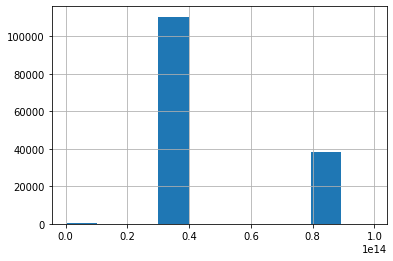

In [46]:
df['IMEI'].hist()

In [23]:
#sns.displot(data = df, x =df['MSISDN/Number'])